In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.read_csv(r"C:\Users\sskou\OneDrive\Pictures\Desktop\iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Pairplot

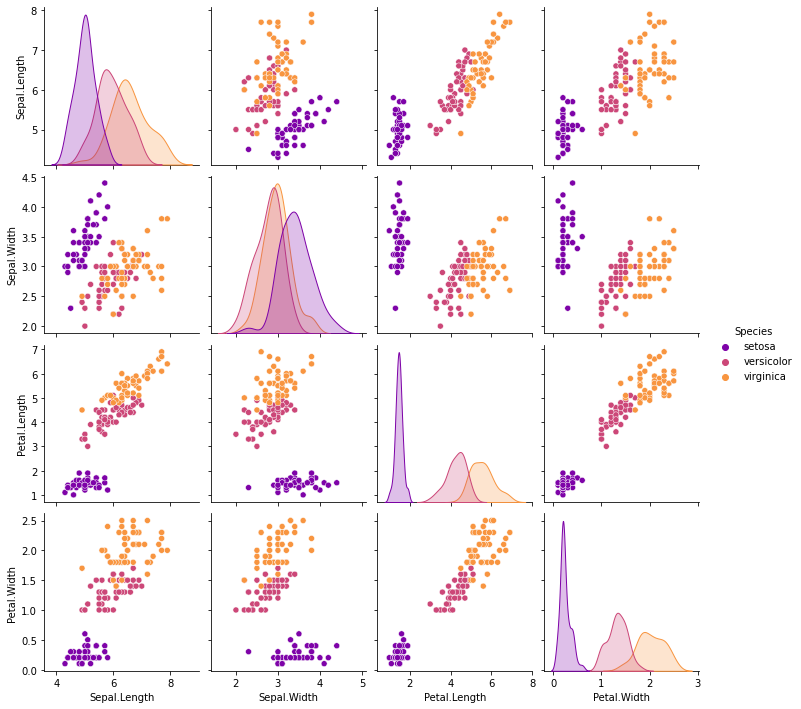

In [5]:
sn.pairplot(df, hue = 'Species', palette = 'plasma');

Plot of sepal length versus sepal width for versicolor flower

C:\Users\sskou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sskou\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

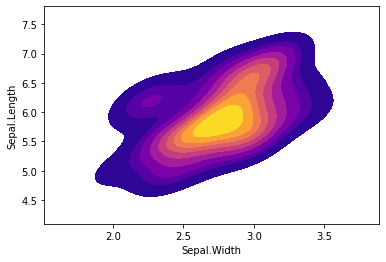

In [6]:
versicolor = df[df['Species'] == 'versicolor']
sn.kdeplot( versicolor['Sepal.Width'], versicolor['Sepal.Length'], cmap="plasma", shade=True, shade_lowest=False)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [9]:
pred = svm.predict(X_test)

Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[17  0  0]
 [ 0 16  1]
 [ 0  1 10]]


Classification Report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.94      0.94      0.94        17
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [12]:
svm.score(X_test,y_test)

0.9555555555555556